In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [4]:
from sklearn.datasets import make_classification

In [5]:
X, y = make_classification(n_features=2, n_redundant=0, random_state=29)
x1 = X[:,0]
x2 = X[:,1]

In [6]:
y_lin = 1.*(x2 > 2.5*x1)
y_sq = (x1 > 0) ^ (x2 > 0)
y_cir = (x1**2 + x2**2) > 2

In [7]:
y_sets = [y, y_lin, y_sq, y_cir]

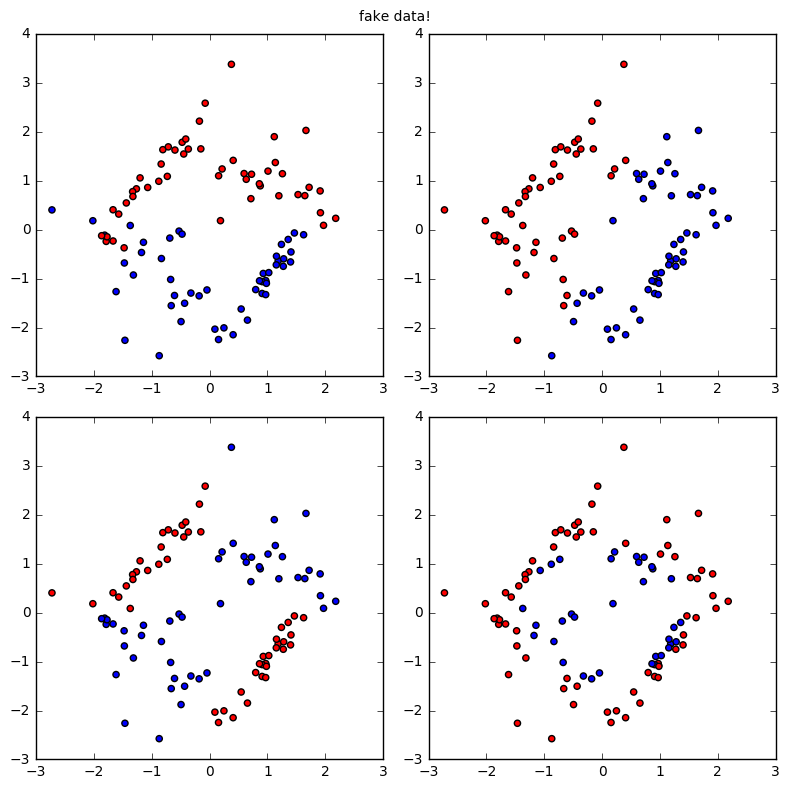

In [8]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
for ax, y_data in zip(axes.flatten(), y_sets):
    ax.scatter(x1, x2, c=y_data, cmap='bwr')
fig.suptitle('fake data!')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

In [9]:
def decision_boundary(X, y, clf, ax):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

In [10]:
def plot_examples(X, y_sets, clf, n_row=2, n_col=2, figsize=(8,8)):
    fig, axes = plt.subplots(n_row,n_col, figsize=figsize)
    for ax, y in zip(axes.flatten(), y_sets):
        ax.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
        decision_boundary(X, y, clf, ax)
    fig.suptitle(clf.__class__.__name__, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)

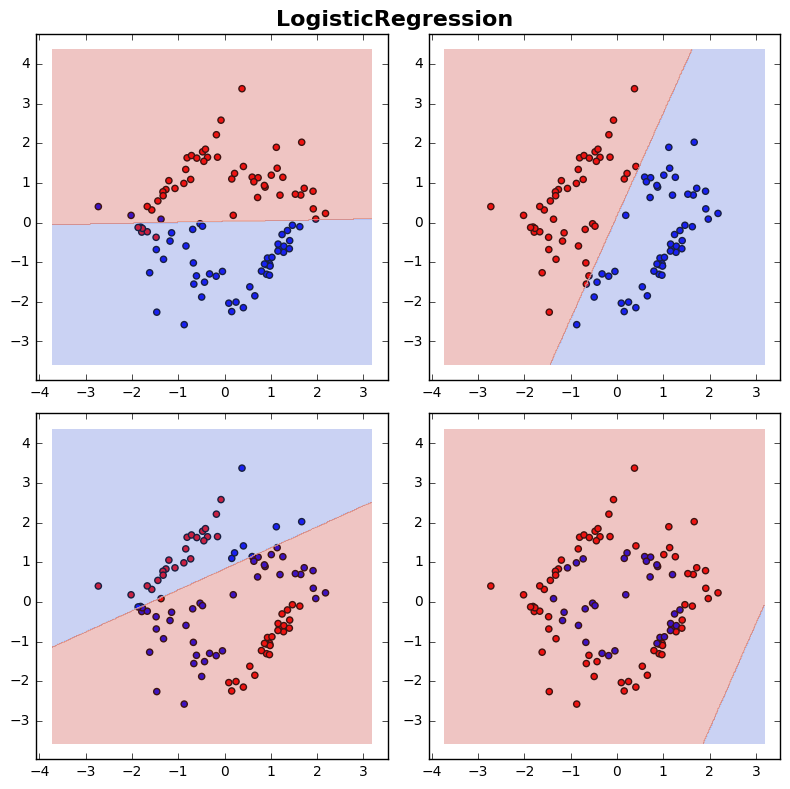

In [11]:
plot_examples(X, y_sets, LogisticRegression())

In [12]:
clf_set = [LogisticRegression(), KNeighborsClassifier(),\
           DecisionTreeClassifier(), RandomForestClassifier(),\
           AdaBoostClassifier(), SVC(kernel='linear'),\
           SVC(kernel='rbf'), GaussianNB()]#, MultinomialNB()]

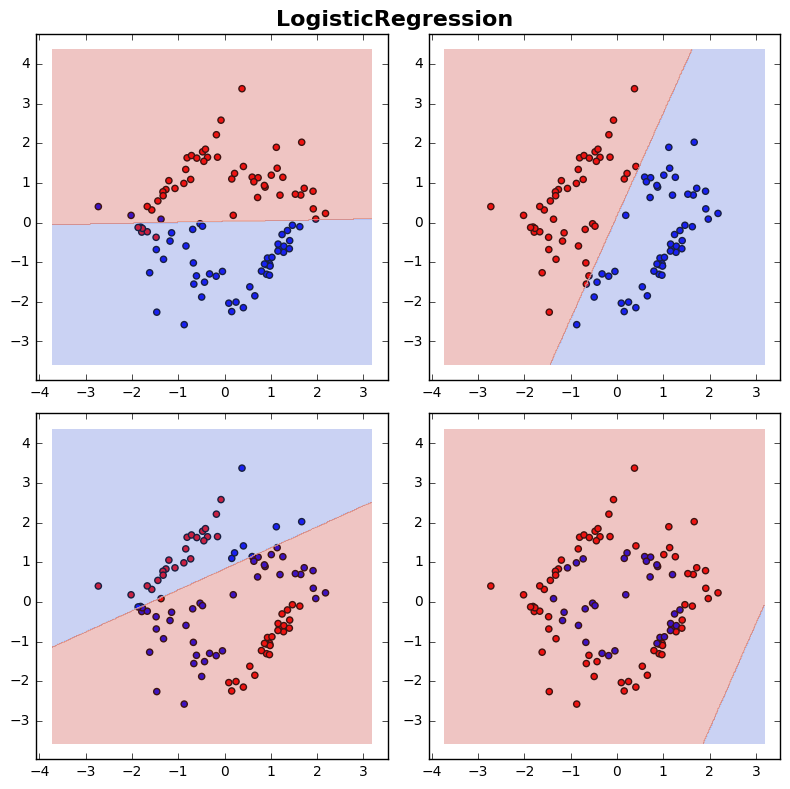

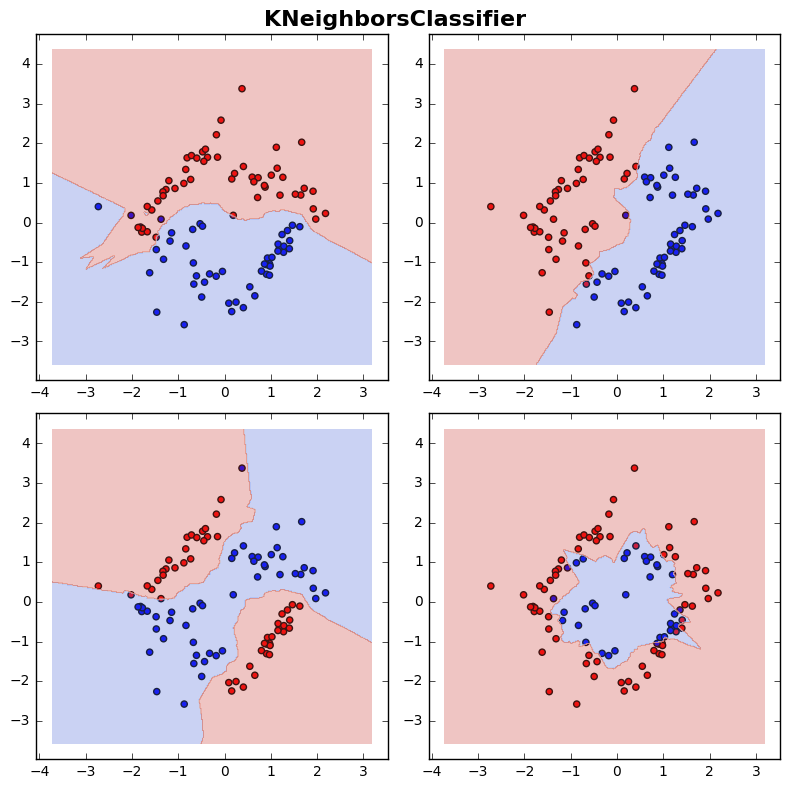

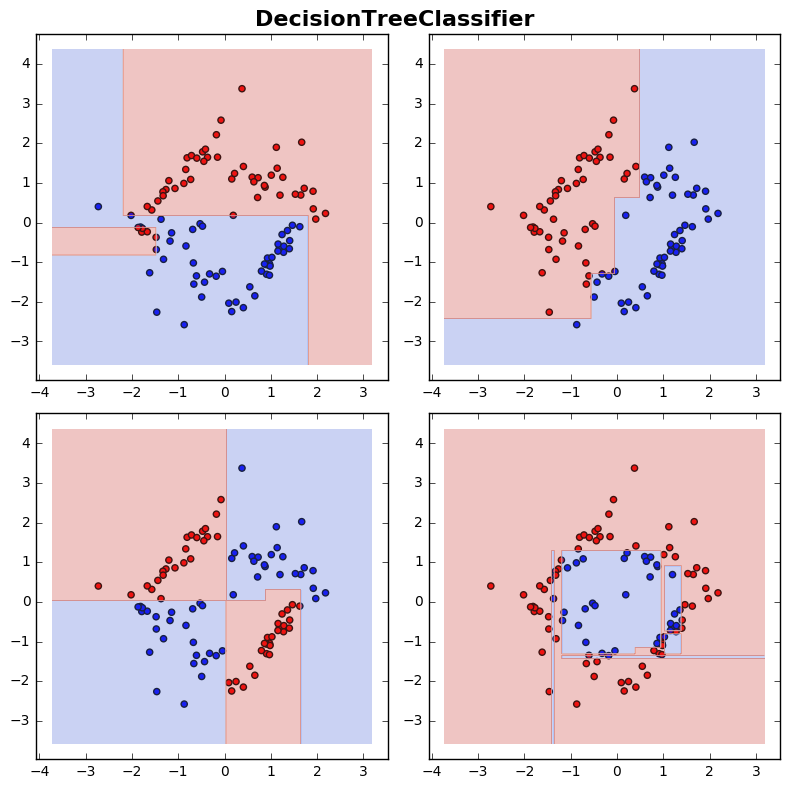

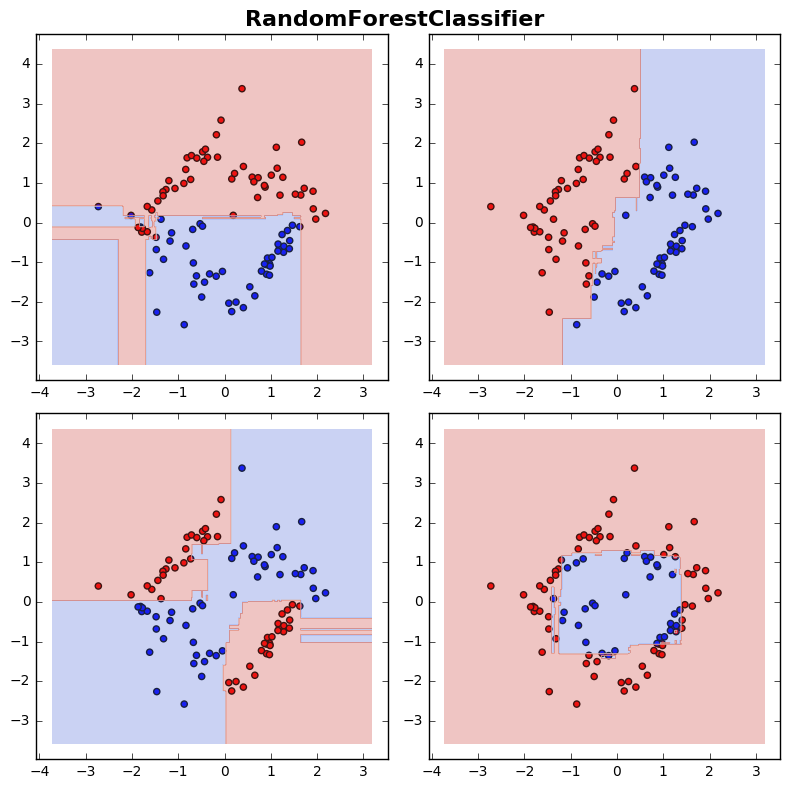

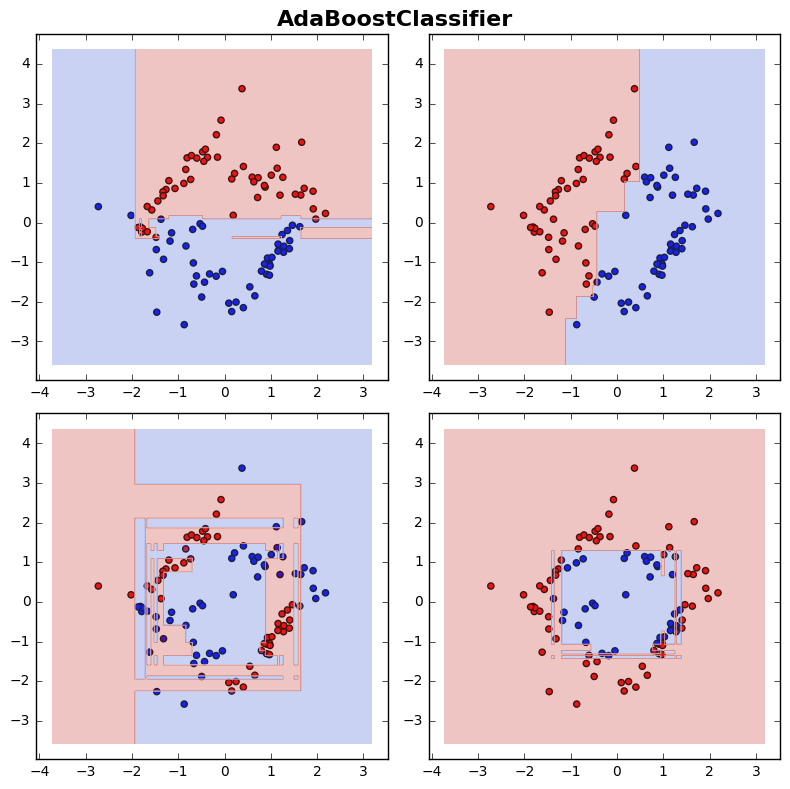

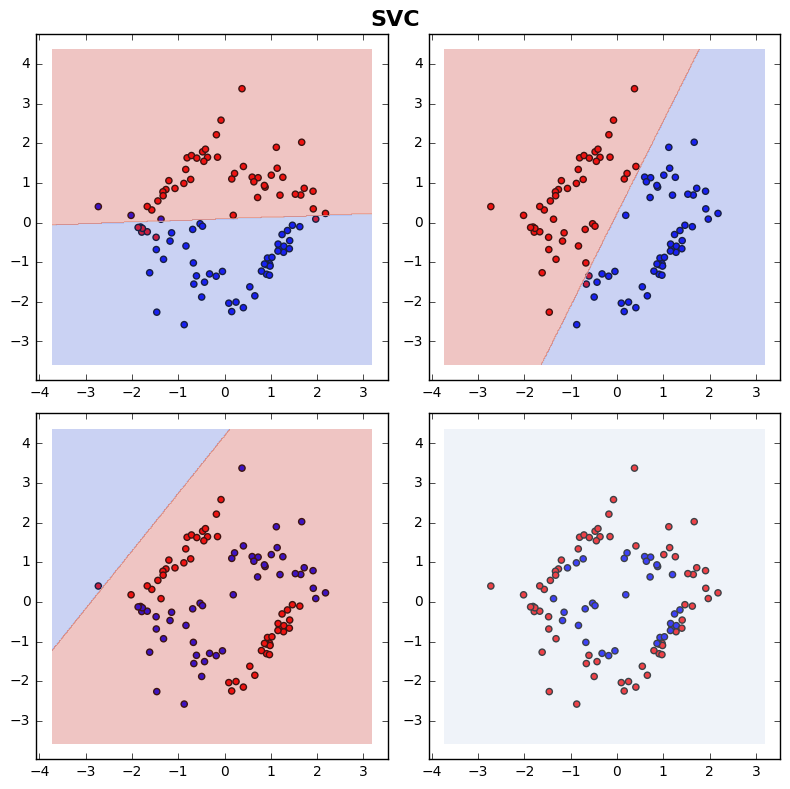

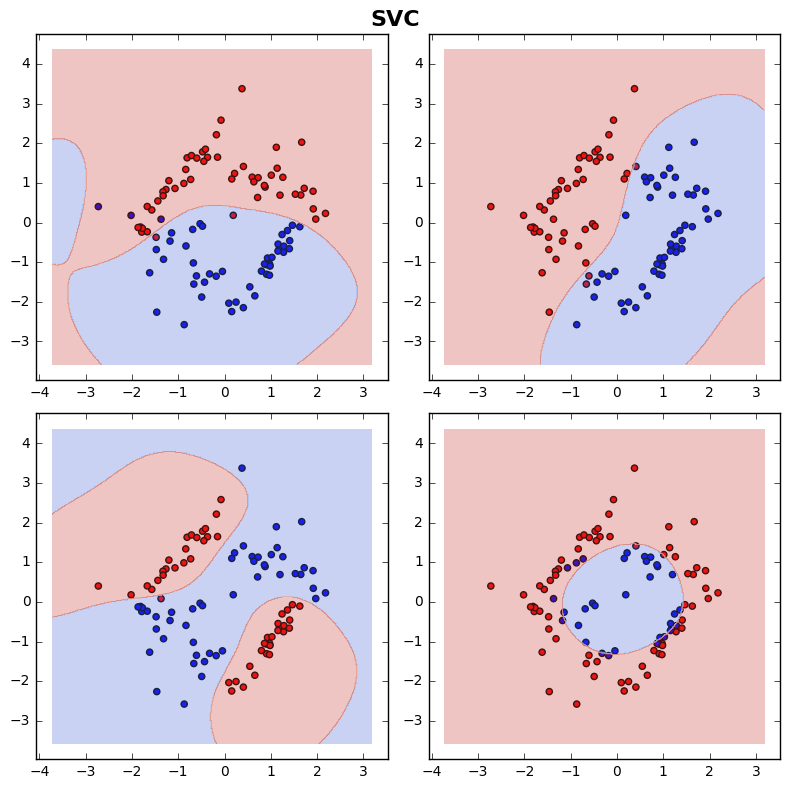

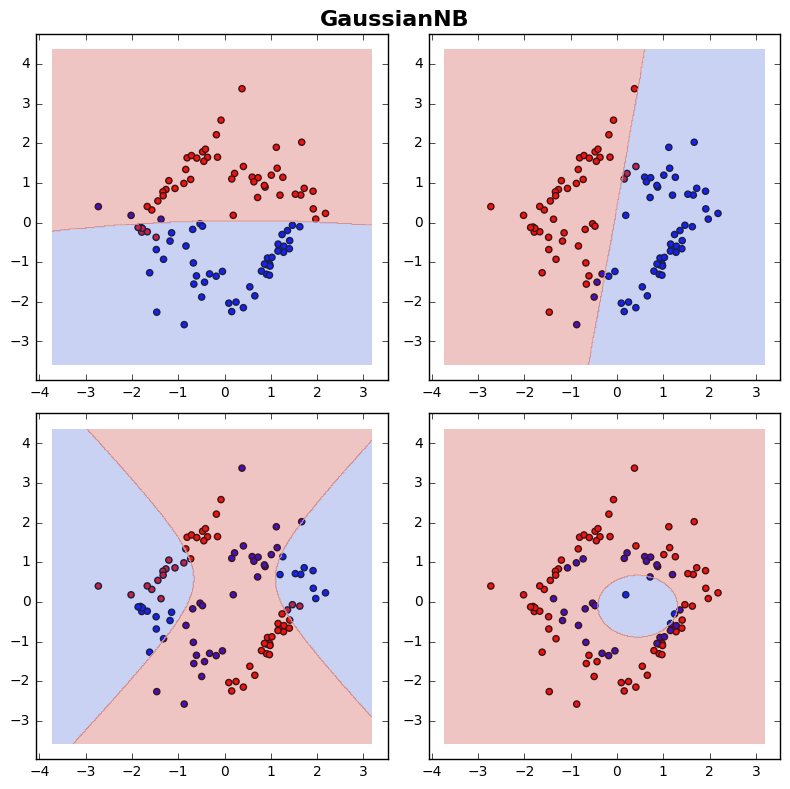

In [13]:
for clf in clf_set:
    plot_examples(X, y_sets, clf)